In [1]:
#!pip install gradio==3.16.2
#!pip install albumentations==1.3.0
#!pip install opencv-contrib-python==4.3.0.36
#!pip install imageio==2.9.0
#!pip install imageio-ffmpeg==0.4.2
#!pip install pytorch-lightning==1.5.0
#!pip install omegaconf==2.1.1
#!pip install test-tube>=0.7.5
#!pip install streamlit==1.12.1
#!pip install einops==0.3.0
#!pip install transformers==4.19.2
#!pip install webdataset==0.2.5
#!pip install kornia==0.6
#!pip install open_clip_torch==2.0.2
#!pip install invisible-watermark>=0.1.5
#!pip install streamlit-drawable-canvas==0.8.0
#!pip install torchmetrics==0.6.0
#!pip install timm==0.6.12
#!pip install addict==2.4.0
#!pip install yapf==0.32.0
#!pip install prettytable==3.6.0
#!pip install safetensors==0.2.7
#!pip install basicsr==1.4.2

In [2]:
from PIL import Image
import json
import matplotlib.pyplot as plt

from utils import *
from vis_prior_layout import UniformRandomNoClipVPL
from vis_prior_generator import CannyVPG, HEDVPG, MLSDVPG, MidasVPG, UniformerVPG

In [3]:
labels_path="/home/ubuntu/dad/roboflow-100-benchmark/rf100/apples-fvpl5/valid/_annotations.coco.json"

In [4]:
with open(labels_path, "r") as f:
    anno = json.load(f)

In [5]:
anno.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [6]:
len(anno["annotations"])

723

In [7]:
anno["annotations"][0]

{'id': 0,
 'image_id': 0,
 'category_id': 2,
 'bbox': [47, 4, 256, 605.5],
 'area': 155008,
 'segmentation': [],
 'iscrowd': 0}

In [8]:
anno["categories"]

[{'id': 0, 'name': 'apples', 'supercategory': 'none'},
 {'id': 1, 'name': 'apple', 'supercategory': 'apples'},
 {'id': 2, 'name': 'damaged_apple', 'supercategory': 'apples'}]

In [9]:
anno["images"][0]

{'id': 0,
 'license': 1,
 'file_name': 'damaged_apple--149-_jpg.rf.005311ca6e5e522e6ebb7c44e4fc9a35.jpg',
 'height': 640,
 'width': 640,
 'date_captured': '2022-07-25T18:57:39+00:00'}

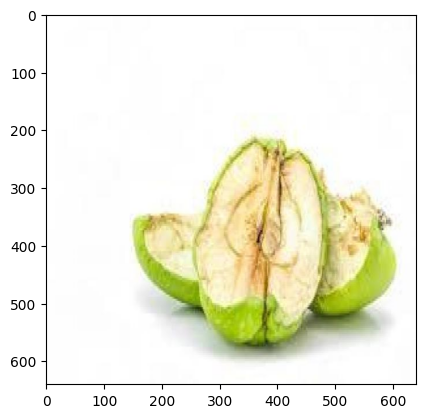

In [10]:
ann_id = 666

img = imread("/home/ubuntu/dad/roboflow-100-benchmark/rf100/apples-fvpl5/valid/"+anno["images"][anno["annotations"][ann_id]['image_id']]['file_name'])
bbox = anno["annotations"][ann_id]['bbox']

plt.imshow(img[:,:,::-1])

In [11]:
naive_vpd = UniformRandomNoClipVPL()

331
151.5
640
640
331
151


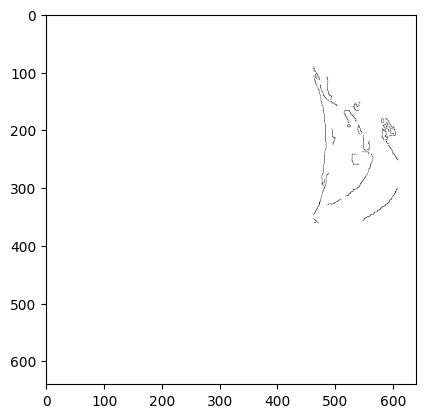

In [12]:
cannyVPG = CannyVPG(vpl=naive_vpd, fill_val=0, low=100, high=200, blur=5)
plt.imshow(cannyVPG.visualize_one_bbox(img=img, bbox=bbox), cmap='Greys')

331
151.5
640
640
331
151


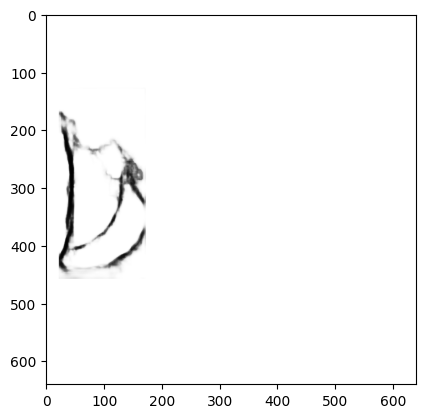

In [13]:
hedVPG = HEDVPG(vpl=naive_vpd, fill_val=0)
plt.imshow(hedVPG.visualize_one_bbox(img=img, bbox=bbox), cmap='Greys')

331
151.5
640
640
331
151


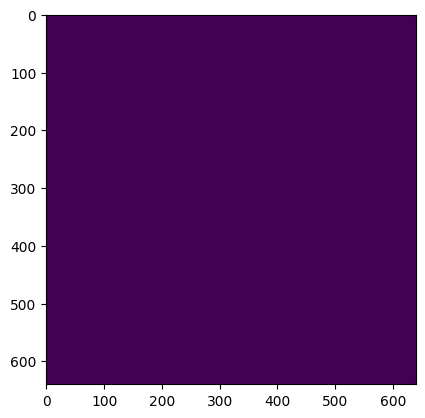

In [14]:
mlsdVPG = MLSDVPG(vpl=naive_vpd, fill_val=0, thr_v=0.2, thr_d=10.)
plt.imshow(mlsdVPG.visualize_one_bbox(img=img, bbox=bbox))

In [15]:
#midasVPG = MidasVPG(vpd=naive_vpd, fill_val=0, a=6.2)
#plt.imshow(midasVPG.draw_one_bbox(img=img, bbox=bbox), cmap='Greys')

Use Checkpoint: False
Checkpoint Number: [0, 0, 0, 0]
Use global window for all blocks in stage3
load checkpoint from local path: /home/ubuntu/dad/ControlNet/annotator/ckpts/upernet_global_small.pth
331
151.5
640
640
331
151


/home/ubuntu/dad/ControlNet/annotator/uniformer/mmseg/models/segmentors/base.py:271: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


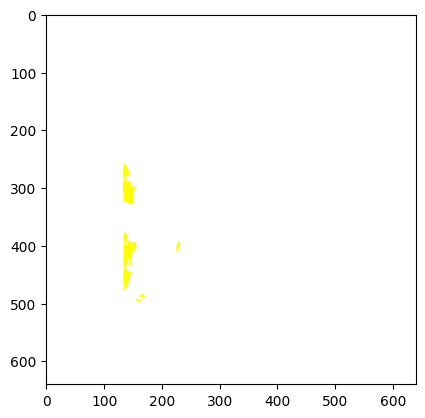

In [16]:
uniVPG = UniformerVPG(vpl=naive_vpd, fill_val=0)
plt.imshow(uniVPG.visualize_one_bbox(img=img, bbox=bbox, fill_val=1))